In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data2 = np.loadtxt('ej2.txt')

In [11]:
Tavg = np.mean(data2)
Tstd = np.std(data2)

print(Tavg,Tstd)

2.0101 0.024777409065517765


In [12]:
data3 = np.loadtxt('ej3.txt')

In [13]:
xavg = np.mean(data3)
xstd = np.std(data3)

print(xavg,xstd)

1.7112666666666667 0.30548496235039496


1.7112666666666667 0.30548496235039496


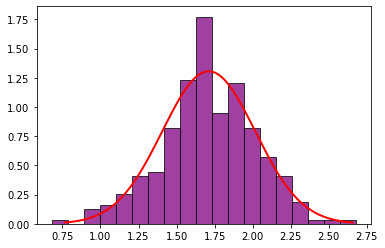

In [14]:
mu,sig = norm.fit(data3)
print(mu,sig)

axis = np.linspace(norm.ppf(0.001,mu,sig),norm.ppf(0.999,mu,sig),1000)
x_pdf = norm.pdf(axis,mu,sig)
plt.plot(axis,x_pdf,'r-',linewidth=2)
n,bins,patches = plt.hist(data3,bins='auto',edgecolor='k',facecolor='purple',alpha=0.75,density=True)

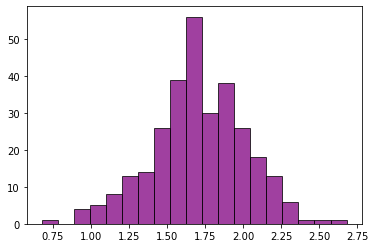

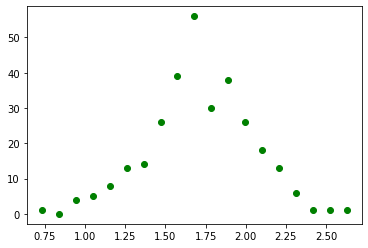

In [20]:
n,bins,patches = plt.hist(data3,bins='auto',edgecolor='k',facecolor='purple',alpha=0.75)
plt.show()

x_hist = []
y_hist = []
for i in range(len(n)):
    x_hist.append((bins[i]+bins[i+1])/2)
    y_hist.append(n[i])
plt.plot(x_hist,y_hist,'go')
mu_h,sig_h = norm.fit(y_hist)
axis_h = np.linspace(norm.ppf(min(x_hist),mu_h,sig_h),norm.ppf(max(x_hist),mu_h,sig_h),1000)
x_pdf_h = norm.pdf(axis_h,mu_h,sig_h)

#plt.hist(data3,bins='auto',edgecolor='k',facecolor='purple',alpha=0.75)
plt.plot(axis_h,x_pdf_h,'r-',linewidth=2)

0.006009853478194706
1.6764950166994719


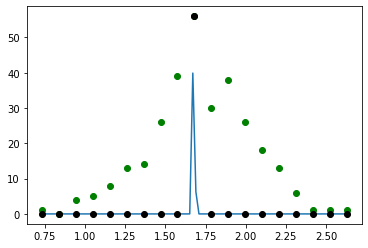

In [30]:
from scipy.optimize import curve_fit

def gauss(x,sig,mu): return np.exp(-((x-mu)**2)/(2*(sig**2))) / (sig*np.sqrt(2*np.pi))

fit_sig,fit_mu = curve_fit(gauss,x_hist,y_hist,[0.3,1.7])[0]

print(fit_sig)
print(fit_mu)

x_adj = np.linspace(min(x_hist),max(x_hist),100)

plt.plot(x_adj,gauss(x_adj,fit_sig,fit_mu))

plt.plot(x_hist,y_hist,'go')
plt.plot(x_hist,gauss(x_hist,fit_sig,fit_mu),'ko')